In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../../Dataset/gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 19)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,North-East,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,North-East,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,North-West,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,North-West,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,North-East,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,North-East,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,North-East,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,North-West,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,North-West,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,North-East,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


### luxury score

<Axes: ylabel='luxury_score'>

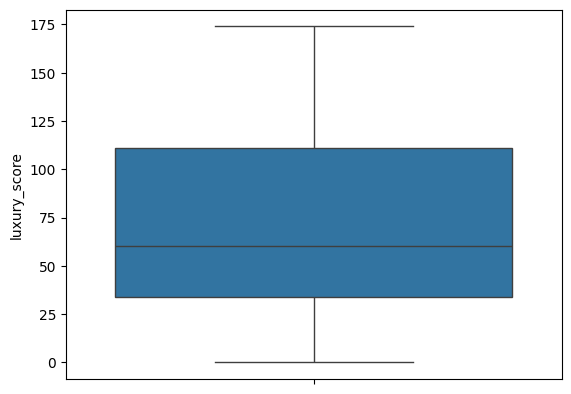

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,North-East,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,North-East,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,North-West,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,North-West,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,North-East,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


### floorNum

<Axes: ylabel='floorNum'>

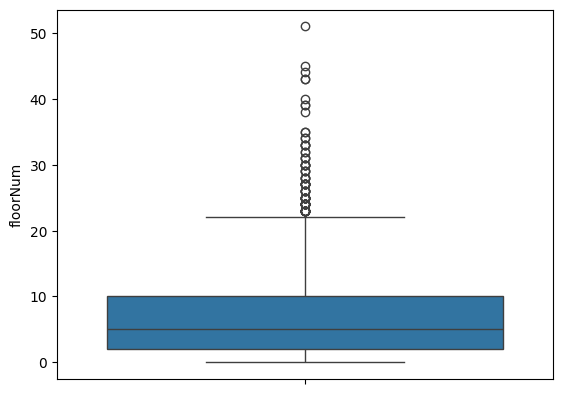

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,North-East,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,North-East,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,North-West,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,North-West,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,North-East,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,North-East,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,North-East,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,North-West,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,North-West,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,North-East,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Mid Floor


In [18]:
!pip install setuptools wheel


In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Copy data to avoid modifying original
data_label_encoded = train_df.copy()

# Select categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Encode categorical columns with OrdinalEncoder
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(f"Categories in column '{col}': {oe.categories_}")

# Prepare features and target
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']


Categories in column 'property_type': [array(['flat', 'house'], dtype=object)]
Categories in column 'sector': [array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 's

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,3.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,2.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,6.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,2.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [21]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

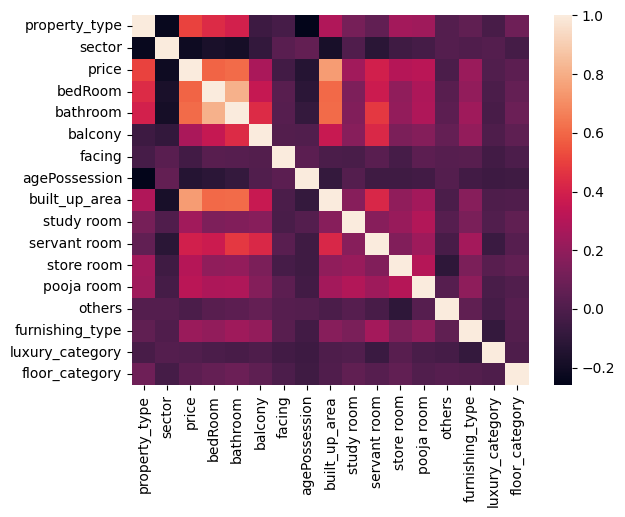

In [22]:
sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,facing,-0.038152
6,agePossession,-0.134171
7,built_up_area,0.748574
8,study room,0.242955
9,servant room,0.391930


### Technique 2 - Random Forest Feature Importance

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.646547
0,property_type,0.100236
1,sector,0.098656
3,bathroom,0.024924
2,bedRoom,0.022417
9,servant room,0.018929
5,facing,0.017176
6,agePossession,0.012792
4,balcony,0.011205
13,furnishing_type,0.009376


### Technique 3 - Gradient Boosting Feature importances

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.675341
1,sector,0.105639
0,property_type,0.097801
2,bedRoom,0.036548
3,bathroom,0.034172
9,servant room,0.023713
10,store room,0.009095
6,agePossession,0.004369
5,facing,0.004301
8,study room,0.003315


### Technique 4 - Permutation Importance

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,0.731971
0,property_type,0.201687
1,sector,0.168679
2,bedRoom,0.021586
9,servant room,0.019309
3,bathroom,0.019232
6,agePossession,0.005778
10,store room,0.002274
11,pooja room,0.001234
12,others,0.000456


### Technique 5 - LASSO

In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
7,built_up_area,1.506983
0,property_type,0.711329
3,bathroom,0.275589
10,store room,0.197571
8,study room,0.170123
13,furnishing_type,0.165147
9,servant room,0.162531
11,pooja room,0.077591
14,luxury_category,0.052769
2,bedRoom,0.017944


### Technique 6 - RFE

In [29]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
7,built_up_area,0.651238
0,property_type,0.100278
1,sector,0.095026
2,bedRoom,0.026292
3,bathroom,0.022187
9,servant room,0.018152
5,facing,0.015895
6,agePossession,0.013851
4,balcony,0.012381
13,furnishing_type,0.009410


### Technique 7 - Linear Regression Weights

In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
7,built_up_area,1.509056
0,property_type,0.710795
3,bathroom,0.282354
10,store room,0.201755
8,study room,0.177939
13,furnishing_type,0.174468
9,servant room,0.171967
11,pooja room,0.081107
14,luxury_category,0.063810
2,bedRoom,0.021135


### Technique 8 - SHAP

In [33]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ------------------------------------ - 524.3/545.3 kB 730.2 kB/s eta 0:00:01
   ---------------------------------------- 545.3/545.3 kB 453.1 kB/s  0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 730.2 kB/s eta 0:00:17
   - -------------------------------------- 0.5/12.6 MB 730.2 kB/s eta 0:00:17
   - -------------------------------------- 0.5/12.6 MB 730.2 kB/s eta 0:00:17
   - -------------------------------------- 0.5/12.6 MB 730.2 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/12.6 MB 459.5 kB/s eta 0:00:26
   -- -------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.8.1 which is incompatible.


In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import shap

# ----------------------------
# Train Random Forest Model
# ----------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

# ----------------------------
# SHAP Explanation
# Using shap.Explainer (NumPy-safe)
# ----------------------------
explainer = shap.Explainer(rf, X_label)
shap_values = explainer(X_label)  # Returns a SHAPValues object

# ----------------------------
# Summarize feature importance
# ----------------------------
# Take absolute values and average across samples
shap_sum = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': X_label.columns,
    'shap_importance': shap_sum
}).sort_values(by='shap_importance', ascending=False)

print(feature_importance_df)

# ----------------------------
# Optional: Visualize SHAP summary plot
# ----------------------------
shap.summary_plot(shap_values, X_label)


ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.3.

In [37]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

NameError: name 'shap_values' is not defined

In [38]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [39]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.212084,0.098656,0.105639,0.168679,-0.067292,0.095026,-0.075997
bedRoom,0.591289,0.022417,0.036548,0.021586,0.017944,0.026292,0.021135
bathroom,0.609777,0.024924,0.034172,0.019232,0.275589,0.022187,0.282354
balcony,0.269637,0.011205,0.001613,-0.002160,-0.044195,0.012381,-0.067048
facing,-0.038152,0.017176,0.004301,-0.004062,-0.071070,0.015895,-0.080689
agePossession,-0.134171,0.012792,0.004369,0.005778,-0.000000,0.013851,0.000507
built_up_area,0.748574,0.646547,0.675341,0.731971,1.506983,0.651238,1.509056
study room,0.242955,0.008337,0.003315,-0.014319,0.170123,0.006945,0.177939
servant room,0.391930,0.018929,0.023713,0.019309,0.162531,0.018152,0.171967


In [40]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [41]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.741487
sector             0.127737
bedRoom            0.029375
bathroom           0.027650
servant room       0.021985
agePossession      0.010143
facing             0.009306
store room         0.007603
balcony            0.006429
furnishing_type    0.004672
luxury_category    0.003789
pooja room         0.003758
floor_category     0.002900
others             0.001792
study room         0.001375
dtype: float64

In [42]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,3.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,2.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,6.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,2.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [43]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

np.float64(0.815617962473375)

In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others','facing']), y_label, cv=5, scoring='r2')

In [48]:
scores.mean()

np.float64(0.8196500940616491)

In [49]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [50]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [51]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,facing,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,3.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,2.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,6.0,3.0,6228.0,1.0,1.0,0.0,0.0,1.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,2.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50
